In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = 'Starter_Code\Pymaceuticals\data\Mouse_metadata.csv'
study_results_path = 'Starter_Code\Pymaceuticals\data\Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

unique_data = complete_data.drop_duplicates(subset=['Mouse ID'], keep='first')
unique_data = unique_data.reset_index(drop='True')

unique_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,0,45.0,0,Capomulin,Female,20,17
245,i557,0,45.0,0,Capomulin,Female,1,24
246,m957,0,45.0,0,Capomulin,Female,3,19
247,f966,0,45.0,0,Capomulin,Male,16,17


In [36]:
#Unique mouse count
mouse_count = len(unique_data)
mouse_count

249

In [37]:
#Isolate duplicate mouse data
duplicates = []
seen = set()

for index, row in complete_data.iterrows():
    row_tuple = tuple(row)
    if row_tuple in seen:
        duplicates.append(row_tuple)
    else:
        seen.add(row_tuple)

duplicates

[('g989', 0, 45.0, 0, 'Propriva', 'Female', 21, 26)]

In [38]:
#Isolate duplicate mouse ID
duplicate_df = pd.DataFrame(duplicates)
duplicate_values = duplicate_df[0].values[0]
print(duplicate_values)

g989


In [39]:
clean_complete_data = []

for index, row in complete_data.iterrows():
    if row['Mouse ID'] not in duplicate_values:
        clean_complete_data.append(row)

complete_data = pd.DataFrame(clean_complete_data)
complete_data = complete_data.reset_index(drop='True')
complete_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [40]:
#Eliminate duplicate mouse from 'complete_data' to refine 'complete_data'
clean_data = complete_data.drop_duplicates('Mouse ID')
clean_data = clean_data.reset_index(drop='True')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,0,45.0,0,Capomulin,Female,20,17
244,i557,0,45.0,0,Capomulin,Female,1,24
245,m957,0,45.0,0,Capomulin,Female,3,19
246,f966,0,45.0,0,Capomulin,Male,16,17


In [41]:
#Eliminate duplicate mouse from 'unique data' to create 'clean data'
clean_data = []
duplicate_data = []

for index, row in unique_data.iterrows():
    if row['Mouse ID'] not in duplicate_values:
        clean_data.append(row)
    
clean_data = pd.DataFrame(clean_data)
clean_data = clean_data.reset_index(drop='True')

clean_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,0,45.0,0,Capomulin,Female,20,17
244,i557,0,45.0,0,Capomulin,Female,1,24
245,m957,0,45.0,0,Capomulin,Female,3,19
246,f966,0,45.0,0,Capomulin,Male,16,17


In [42]:
#Clean mouse count
clean_mouse_count = len(clean_data)
clean_mouse_count

248

In [43]:
#Create data for drug regimens
drug_regimen = complete_data.drop_duplicates(subset='Drug Regimen', keep='first')
drug_regimen = drug_regimen['Drug Regimen']
drug_regimen = list(drug_regimen)

for tumor in drug_regimen:
    mean_results = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
    median_results = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
    variance_results = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
    stnd_results = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
    err_results = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drug_dict = {
    'Drug Regimen': drug_regimen,
    'Mean Tumor Volume': mean_results,
    'Median Tumor Volume': median_results,
    'Tumor Volume Variance': variance_results,
    'Tumor Volume Std. Dev.': stnd_results,
    'Tumor Volume Std. Err.': err_results
}

drug_regimen_df = pd.DataFrame(drug_dict)
drug_regimen_df


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,,
Capomulin,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Ketapril,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Naftisol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Infubinol,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Stelasyn,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,Ramicane,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,Zoniferol,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,Propriva,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,Placebo,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
#Utilise aggregation
drug_regimen_df = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
drug_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, '# of Observed Mouse Timepoints')

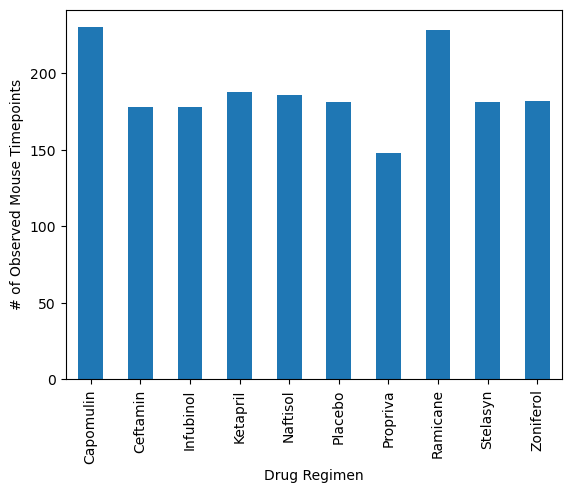

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_df = complete_data.groupby('Drug Regimen')['Mouse ID'].count()

tpax = timepoint_df.plot.bar()
tpax.set_xlabel('Drug Regimen')
tpax.set_ylabel('# of Observed Mouse Timepoints')


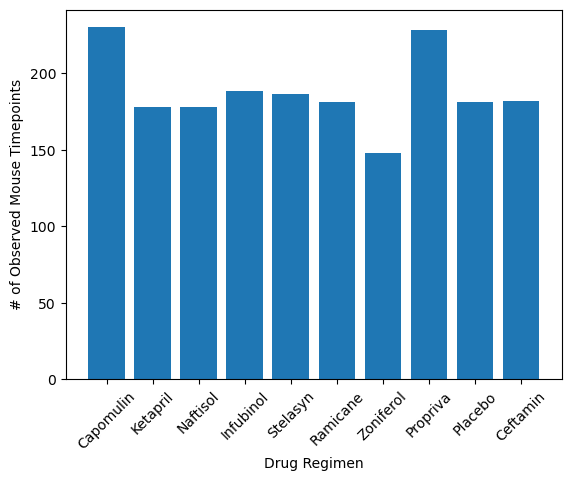

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen, timepoint_df, width=0.8, label='Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()

[]

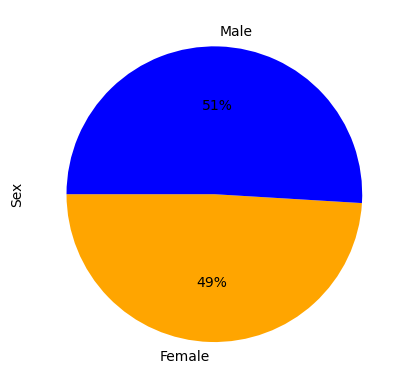

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = complete_data['Sex'].drop_duplicates(keep='first')
mouse_sex = list(mouse_sex)

mouse_sex_df = complete_data.groupby('Sex')['Mouse ID'].count()
mouse_sex_df 

mouse_colours = ['orange', 'blue']
msax = mouse_sex_df.plot.pie(autopct='%1.0f%%', startangle=180, colors=mouse_colours)
msax.set_ylabel('Sex')

msax.plot()


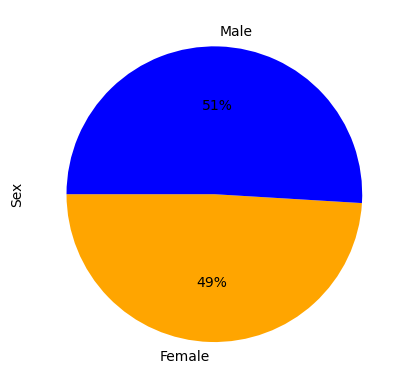

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex_df, labels=mouse_sex_df.index, autopct='%1.0f%%', startangle=180, colors=mouse_colours)
plt.ylabel('Sex')
plt.show()

In [49]:

#Dataframe for last timepoint per mouse ID
last_timepoint = complete_data.groupby('Mouse ID')[['Timepoint']].max()
last_timepoint = pd.DataFrame(last_timepoint)
last_timepoint = last_timepoint.reset_index()
last_timepoint = last_timepoint.drop_duplicates( keep='last')

last_timepoint.head(20)

last_timepoint_df = pd.merge(last_timepoint, complete_data, on=['Mouse ID', 'Timepoint'])

last_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [50]:
#Create a data frame for values with these treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = list(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
regimen_df = []

for index, row in last_timepoint_df.iterrows():
    if row['Drug Regimen'] in regimen_list:
       regimen_df.append(row)
        
regimen_df = pd.DataFrame(regimen_df)
regimen_df = regimen_df[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
lowerc_outlier = 0
upperc_outlier = 0
potential_outliers = []

q3 = regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75) 
q1 = regimen_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)

iqr = q3 - q1

upper_outlier = q3 + (iqr*1.5)
lower_outlier = q1 - (iqr*1.5)


for index, row in regimen_df.iterrows():
    current_regimen = row['Drug Regimen']
    current_volume = row['Tumor Volume (mm3)']
    outliers_dict = {regimen: [] for regimen in regimen_list}

    if current_regimen in iqr:
        lowerc_outlier = lower_outlier.loc[current_regimen]
        upperc_outlier = upper_outlier.loc[current_regimen]

    if current_volume < lowerc_outlier or current_volume > upperc_outlier:
        potential_outliers.append(row)

for row in potential_outliers:
    regimen_name = row['Drug Regimen']
    if regimen_name in regimen_list:
        outliers_dict[regimen_name].append(row)
      
outlier_values = list(outliers_dict.values())
outlier_values = pd.DataFrame(outlier_values[2])


for regimen in regimen_list:
    if regimen in outlier_values['Drug Regimen'].values:

        regimen_outliers = outlier_values[outlier_values['Drug Regimen'] == regimen]['Tumor Volume (mm3)']

        indices = regimen_outliers.index
        tumor_volumes = outlier_values['Tumor Volume (mm3)']
        
        print(f"{regimen}'s potential outliers:")
        for index, tumor_volume in zip(indices, tumor_volumes):
            print(f"Index, {index}: potential outlier: {tumor_volume}")
    else:
        print(f"{regimen}'s potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:
Index, 31: potential outlier: 36.3213458
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


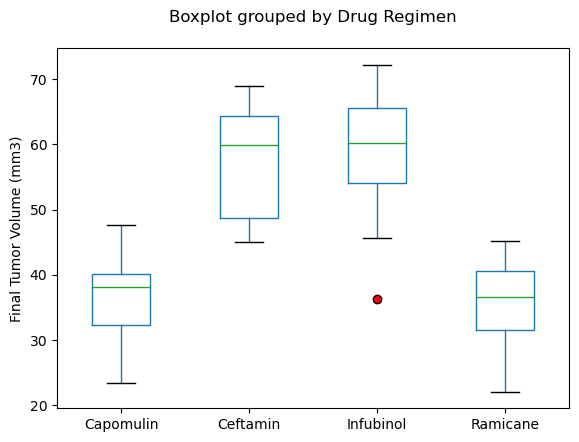

In [57]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumes = regimen_df['Tumor Volume (mm3)']
regimens = regimen_df['Drug Regimen']

regimen_df.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, flierprops=dict(markerfacecolor='red'))
plt.title('')
plt.xlabel('')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


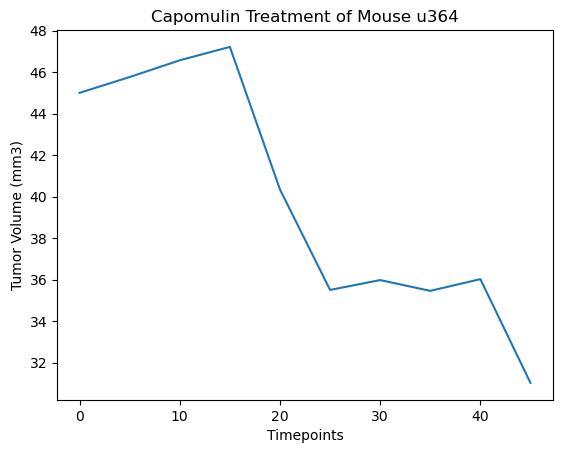

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_u364 = complete_data[complete_data['Mouse ID'] == 'u364']

mouse_timepoints = mouse_u364['Timepoint']
mouse_tumors = mouse_u364['Tumor Volume (mm3)']

plt.plot(mouse_timepoints, mouse_tumors, label='Tumor Volume')

plt.title('Capomulin Treatment of Mouse u364')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [54]:
#Create Data for Scatter Plot
capomulin_data = complete_data[complete_data['Drug Regimen'] == 'Capomulin']
capomulin_data = pd.DataFrame(capomulin_data)
capomulin_tumors = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()


capomulin_tumors = pd.DataFrame(capomulin_tumors)
capomulin_weights = pd.DataFrame(capomulin_weights)

capomulin_set = pd.merge(capomulin_tumors, capomulin_weights, on='Mouse ID')

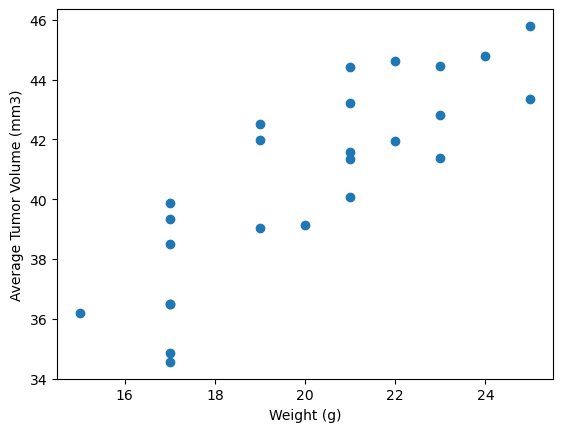

In [55]:
#Create scatter plot for average tumor volume per mouse weight
plt.scatter(capomulin_set['Weight (g)'], capomulin_set['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is  0.84


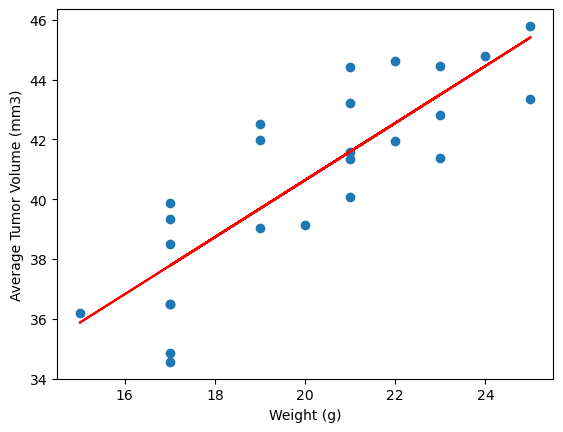

In [56]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = capomulin_set['Weight (g)'].corr(capomulin_set['Tumor Volume (mm3)'])

x_values = capomulin_set['Weight (g)']
y_values = capomulin_set['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print("The correlation between mouse weight and the average tumor volume is ", correlation.round(2))
plt.show()


ANALYSIS:
Based on the data provided, we can analyse the effectiveness & consistency of drug regimens and determine how suitable capomulin is in comparison to the other regimens.
One thing that stands out is the mean, median, standard deviation, standard error & variance are all significantly lower than the rest of the regimens, which credits capomulin for not only it's consistency (based on the small variance), but it's generall effectiveness based not only on the fact the mean tumor volumes are lower, but the line chart representing the progressive effect this drug regimen had on a mouse tested with it.

To further justify it's effectiveness compared to other drug regimens, there is a visable discrepency between capomulin & ramicane (which showed consistent results) and  ceftamin & infubinol (showing inconsistent results to the extent of infubinol producing a potential outlier).

Despite the variation of the population of mice whether it be sex or size, it has no genuine impact on the data as the mouse sex was very close to 50/50 & there was a strong correlation between the mouses size and the average size of their tumors, ultimately suggesting 'the bigger they are, the bigger their tumors'. 